# Mixing game demonstratiom from Chapter 3

## Python imports

In [1]:
import scipy as sp
from scipy.integrate import odeint

import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
from IPython.display import display

%matplotlib inline
plt.style.use("ggplot")

## BTX kinetics and feed point 

In [2]:
#BTX kinetics
def btx_rate(C,t):
    
    #Concentration vector: C = [cB, cE, cT, cX, cD, cH]
    cB = C[0]
    cE = C[1]
    cT = C[2]
    
    #rate constants
    k1 = 1.0
    k2 = 1.0
    k3 = 10.0  
    
    rB = -k1*cB*cE**0.5 - 2*k3*cB**2
    rE = -0.5*k1*cB*cE**0.5 - 0.5*k2*cT*cE**0.5
    rT = k1*cB*cE**0.5 - k2*cT*cE**0.5
    rX = k2*cT*cE**0.5
    rD = k3*cB**2
    rH = rD
    
    dC = sp.array([rB, rE, rT, rX, rD, rH])
    return dC

#Feed point
Cf = sp.array([1., 0.5, 0., 0., 0., 0.])

## Integrate batch equation from feed point

In [3]:
t_end = 10
N_pts = 100
ts = sp.logspace(-3, sp.log10(t_end), N_pts)

pfr_cs = odeint(btx_rate,Cf,ts)

## Plotting function 

In [4]:
def plot_fn(idx1=N_pts-1, L1=0.5,
            idx2=N_pts-1, L2=0.5):
    
    #first mixing point
    C1 = pfr_cs[idx1,:]
    Cm1 = Cf + L1*(C1-Cf)
    
    #integrate from mixing pt
    pfr2_cs = odeint(btx_rate,Cm1,ts)
    
    #2nd mixing pt
    C2 = pfr2_cs[idx2,:]
    Cm2 = Cf + L2*(C2-Cf)
    
    #integrate from 2nd mixing pt
    pfr3_cs = odeint(btx_rate,Cm2,ts)
    
    #plot
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca()
    plt.hold(True)
    
    #plot PFR trajectpries
    h1, = ax.plot(pfr_cs[:,0],pfr_cs[:,2],'r-')
    h2, = ax.plot(pfr2_cs[:,0],pfr2_cs[:,2], 'r:')
    h3, = ax.plot(pfr3_cs[:,0],pfr3_cs[:,2], 'r--')
    
    #terminating points and mixing pt 1
    plt.plot(C1[0],C1[2], 'bo')
    plt.plot(Cm1[0],Cm1[2], 'g^')
    plt.plot(C2[0],C2[2], 'b*')
    plt.plot(Cm2[0],Cm2[2], 'gs')
    
    #mixing lines
    #plt.plot([Cf[0],C1[0]], [Cf[2],C1[2]], 'k--')
    #plt.plot([Cf[0],C2[0]], [Cf[2],C2[2]], 'k--')
    
    #legend
    ax.legend([h1,h2,h3], ['Original batch', '1st mix', '2nd mix'])
    
    plt.xlabel('Benzene (mol/L)')
    plt.ylabel('Toluene (mol/L)')
    plt.axis([0,1, 0,0.08])
    
    plt.show()
    

## Interactive mixing game 

Use the sliders to simulate two iterations of the mixing game. The *idx* parameters adjust the ending time of the current batch - e.g. idx1 indicates the terminating point of the original batch trajectory used to mix with the feed, that is used a starting concentration for the first mixture batch trajectory. 

Similarly, the *L* parameters adjust the mixing fraction between the batch and the feed point $\mathbf{C}_f$.

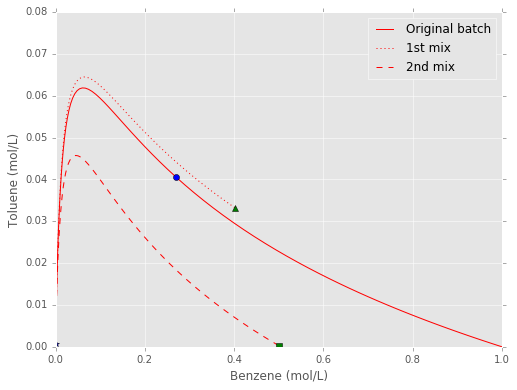

In [5]:
interactive(plot_fn, idx1=(1,N_pts-1,1), L1=(0,1,0.02),
                     idx2=(1,N_pts-1,1), L2=(0,1,0.02))